<h1 style="color:rgb(0,120,170)">Assignment 2: Gaussian Classifier, Bias-Variance Decomposition, Evaluation Measures </h1>

This material, no matter whether in printed or electronic form,
may be used for personal and non-commercial educational use
only. Any reproduction of this material, no matter whether as a
whole or in parts, no matter whether in printed or in electronic
form, requires explicit prior acceptance of the authors.

<h2 style="color:rgb(0,120,170)">Automatic Testing Guidelines</h2>

Automatic unittesting requires you to submit a notebook which contains strictly defined objects.
Strictness of definition consists of unified shapes, dtypes, variable names and more.

Within the notebook, we provide detailed instruction which you should follow in order to maximise your final grade.

**Name your notebook properly**, follow the pattern in the template name:

**Assignment_N_NameSurname_matrnumber**
<ol>
    <li>N - number of assignment</li>
    <li>NameSurname - your full name where every part of the name starts with a capital letter, no spaces</li>
    <li>matrnumber - you student number on ID card (with k, potenitially with a leading zero)</li>
</ol>

Don't add any cells but use the ones provided by us. All cells have a unique ID so that the unit test can find it, so please do not add or remove any cell!

Always make sure that implemented functions have the correct output and given variables contain the correct data type. In the descriptions for every function you can find information on what datatype an output should have and you should stick to that in order to minimize conflicts with the unittest. Don't import any other packages than listed in the cell with the "imports" tag.

Questions are usually multiple choice (except the task description says otherwise) and can be answered by changing the given variables to either "True" or "False". "None" is counted as a wrong answer in any case!

**Note:** Never use variables you defined in another cell in your functions directly; always pass them to the function as a parameter. In the unitest, they won't be available either. If you want to make sure that everything is executable for the unittest, try executing cells/functions individually (instead of running the whole notebook).

<h2 style="color:rgb(0,120,170)">Task 1: Gaussian classifier: visualization & parameter estimation</h2>

The goal of this task is to explore the given (artificial) data before diving into the classification function. To do this, we will use `matplotlib` to plot the data set and `numpy` to estimate the means & covariance matrices of the classes as well as the probability of encountering a positive/negative example.

* **Plot 1.1**: Visualize the data stored in `normal.csv` with two different colors using a scatter plot and store it in the given variable. Always label the axes of all your plots. We also suggest to make a plot legend indicating which color belongs to
which label.
* **Question 1.1**: Answer 2 questions regarding the data depicted in the plot.
* **Code 1.2**: We assume that the data is distributed according to a two-dimensional (bivariate) normal distribution:
    - Write a function that estimates the mean and covariance matrix for the entire dataset, the means and covariance matrices for each class, and the probabilities $p(y=+1)$ and $p(y=-1)$.
    - Return a tuple containing the results (the resulting list should be of length 8). The datatype for `meanX`, `covX`, `meanXpos`, `covXpos`, `meanXneg`, and `covXneg` should be a numpy array, for $p(y=+1)$ and $p(y=-1)$ it should be float.

<h3 style="color:rgb(210,90,80)">Plot 1.1 (2 Points):</h3>

In [33]:
# Nothing to do here, just run the cell.
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [34]:
# Nothing to do here, just run the cell.
Z = np.genfromtxt('normal.csv', delimiter=',')
X, y = Z[:,:-1].astype(np.float32), Z[:,-1].astype(int)

In [35]:
def scatter_plot(X: np.ndarray, y: np.ndarray):
    """Creates a scatter-plot for the dataset X with labels y.

    Parameters
    ----------
    X : (N, K) np.ndarray
        Data to plot.
    y : (N,) np.ndarray
        labels of the data.
    """
    # Unique labels in y
    unique_labels = np.unique(y)
    for label in unique_labels:
        # Select points corresponding to the current label
        points = X[y == label]
        # Scatter plot for current label with label-based color
        plt.scatter(points[:, 0], points[:, 1], label=f'Label {label}')
    
    # Adding plot details
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Scatter Plot of Dataset X with Labels y")
    plt.legend()
    plt.show()


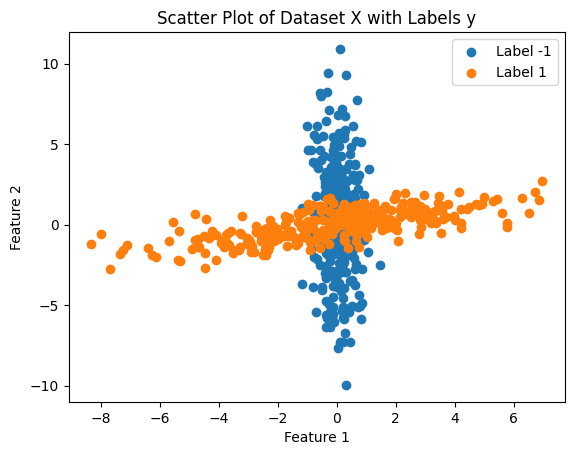

In [36]:
# Nothing to do here, just run the cell.
scatter_plot(X, y)

<h3 style="color:rgb(210,90,80)">Question 1.1 (2 Points):</h3>

***Answer the following yes/no questions concerning the distribution of the data:***

a1_) Would a linear regression method be an optimal choice for this task?<br>
b1_) Would a linear classifier achieve a better performance than 25% misclassification?<br>

To answer the question, assign "True" or "False" boolean values to variables in the next cell. For example, if you think that **a1_)** is correct, define a variable `a1_` and set it to `True`, the same applies to **b1_)**. A non-correctly answered question as well as no answer (i.e. answer “None”) yields 0 points for a specific question.<br>
<b>Note:</b> Do not reuse these variable names. They are used for testing.

In [37]:
# YOUR CODE HERE
a1_ = False
b1_ = True

In [38]:
# DO NOT DELETE THIS CELL!
assert a1_ is not None, "Store True/False!"
assert a1_ in [True, False], "Invalid Answer!"

In [39]:
# DO NOT DELETE THIS CELL!
assert b1_ is not None, "Store True/False!"
assert b1_ in [True, False], "Invalid Answer!"

<h3 style="color:rgb(210,90,80)">Code 1.2 (6 Points):</h3>

In [40]:
def est_mean_cov(X: np.ndarray, y: np.ndarray) -> tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray, np.ndarray, np.ndarray, float, float]:
    """Estimate means and covariance matrices from the given data, as well as the probability of encountering a positive or negative example.
    Utilize numpy functions for calculating the results.

    Parameters
    ----------
    X : (N, K) np.ndarray
        Data matrix of shape (n_samples, n_features).
    y : (N,) np.ndarray
        Data vector of shape (n_samples,), with binary labels (e.g., +1 or -1).

    Returns
    -------
    meanX : (K,) np.ndarray
        Mean vector (one entry per feature) for the entire dataset. 
    covX : (K, K) np.ndarray
        Covariance matrix for the entire dataset.
    meanXpos : (K,) np.ndarray
        Mean vector (one entry per feature) for positive samples.
    covXpos : (K, K) np.ndarray
        Covariance matrix for positive samples.
    meanXneg : (K,) np.ndarray
        Mean vector (one entry per feature) for negative samples.
    covXneg : (K, K) np.ndarray
        Covariance matrix for negative samples.
    p_ypos : float
        Probability of a positive example, p(y = +1).
    p_yneg : float
        Probability of a negative example, p(y = -1).
    """
    # YOUR CODE HERE
    # Mean and covariance for the entire dataset
    meanX = np.mean(X, axis=0)
    covX = np.cov(X, rowvar=False)

    # Positive and negative samples
    Xpos = X[y == 1]
    Xneg = X[y == -1]

    # Mean and covariance for positive samples
    meanXpos = np.mean(Xpos, axis=0)
    covXpos = np.cov(Xpos, rowvar=False)

    # Mean and covariance for negative samples
    meanXneg = np.mean(Xneg, axis=0)
    covXneg = np.cov(Xneg, rowvar=False)

    # Probability of positive and negative examples
    p_ypos = np.mean(y == 1)
    p_yneg = np.mean(y == -1)

    return meanX, covX, meanXpos, covXpos, meanXneg, covXneg, p_ypos, p_yneg

In [41]:
# DO NOT DELETE THIS CELL!
res = est_mean_cov(X, y)
assert len(res) == 8, "The number of outputs is wrong!"
meanX, covX, meanXpos, covXpos, meanXneg, covXneg, p_ypos, p_yneg = res

In [42]:
# DO NOT DELETE THIS CELL!
assert isinstance(meanX, np.ndarray), "The mean of the whole data is not a np.ndarray!"
np.testing.assert_array_almost_equal(meanX, np.array([-0.057087306,  0.064688794], dtype=np.float32), 4)

In [43]:
# DO NOT DELETE THIS CELL!
assert isinstance(covX, np.ndarray), "The covariance of the whole data is not a np.ndarray!"
np.testing.assert_array_almost_equal(covX, np.array([[4.321541110644044, 0.9361894568083656], [0.9361894568083656, 6.752613915214139]], dtype=np.float32), 4)

In [44]:
# DO NOT DELETE THIS CELL!
assert isinstance(meanXpos, np.ndarray), "The mean of the positive samples is not a np.ndarray!"
np.testing.assert_array_almost_equal(meanXpos, np.array([-0.14820707, -0.037901126], dtype=np.float32), 4)

In [45]:
# DO NOT DELETE THIS CELL!
assert isinstance(covXpos, np.ndarray), "The covariance of the positive sample is not a np.ndarray!"
np.testing.assert_array_almost_equal(covXpos, np.array([[8.44226725, 2.01781502], [2.01781502, 0.95332618]], dtype=np.float32), 4)

In [46]:
# DO NOT DELETE THIS CELL!
assert isinstance(meanXneg, np.ndarray), "The mean of the negative samples is not a np.ndarray!"
np.testing.assert_array_almost_equal(meanXneg, np.array([0.03403238, 0.16727877], dtype=np.float32), 4)

In [47]:
# DO NOT DELETE THIS CELL!
assert isinstance(covXneg, np.ndarray), "The covariance of the negative sample is not a np.ndarray!"
np.testing.assert_array_almost_equal(covXneg, np.array([[ 0.19860714, -0.16106351], [-0.16106351, 12.55336585]], dtype=np.float32), 4)

In [48]:
# DO NOT DELETE THIS CELL!
assert isinstance(p_ypos, float), "The probably of a positive sample is not a float!"
assert p_ypos == 0.5, "The probability of a positive sample is not correct!"

In [49]:
# DO NOT DELETE THIS CELL!
assert isinstance(p_yneg, float), "The probability of a negative sample is not a float!"
assert p_yneg == 0.5, "The probability of a negative sample is not correct!"

In [50]:
# Nothing to do here, just run the cell.
print("Entire dataset:\n")
print("Mean = ", meanX, "\n")
print("Covariance:")
print(pd.DataFrame(covX,columns=["x1","x2"],index=["x1","x2"]),"\n")
print(30 * "=")
print("Positive class:\n")
print("Mean = ", meanXpos, "\n")
print("Covariance:")
print(pd.DataFrame(covXpos,columns=["x1","x2"],index=["x1","x2"]),"\n")
print("p(y=+1) =", p_ypos, "\n")
print(30 * "=")
print("Negative class:\n")
print("Mean =", meanXneg, "\n")
print("Covariance:")
print(pd.DataFrame(covXneg,columns=["x1","x2"],index=["x1","x2"]),"\n")
print("p(y=-1) =", p_yneg)

Entire dataset:

Mean =  [-0.05708731  0.06468879] 

Covariance:
          x1        x2
x1  4.321541  0.936189
x2  0.936189  6.752614 

Positive class:

Mean =  [-0.14820707 -0.03790113] 

Covariance:
          x1        x2
x1  8.442267  2.017815
x2  2.017815  0.953326 

p(y=+1) = 0.5 

Negative class:

Mean = [0.03403238 0.16727877] 

Covariance:
          x1         x2
x1  0.198607  -0.161064
x2 -0.161064  12.553366 

p(y=-1) = 0.5


<h2 style="color:rgb(0,120,170)">Task 2: Gaussian classifier: compute classifier & visualization</h2>

Now that we got a good idea of the data, we want to implement a classifier and visualize it.

- **Code 2.1**: Compute an optimal classification function $g_opt$ in `calc_g_opt()`. To do this, you should:
    - Calculate the values of the corresponding parameters $\mathbf{A}$, $\mathbf{b}$ and $c$ in the provided functions (have a look at the lecture slides).
    - Store the results in the given parameters `A` (np.ndarray), `b` (np.ndarray), `c` (float), and `g_opt` (np.ndarray).
    - Print the values of $\mathbf{A}$, $\mathbf{b}$ and $c$ that you have calculated with their respective shapes.
    - Note: You can reuse items from the previous task.
* **Plot 2.2**: Visualize the classification function and the original data samples from Task 1.1. in **one** two-dimensional plot. I.e., the plot should show the data samples -- blue for positive and orange for negative -- and also show the classification function (500x500 grid points) in the corresponding (or similar) colors. For the grid points: use alpha=0.05 for opaquness and s=1 for the marker size. The decision boundary will become visible as the line separating the two classification territories. Again: Label the axes and plot a legend.
* **Question 2.2**: Answer 2 questions about the result.

<h3 style="color:rgb(210,90,80)">Code 2.1 (10 Points):</h3>

In [51]:
def calc_A(covXpos: np.ndarray, covXneg: np.ndarray) -> np.ndarray:
    """Calculate the desired parameter A based on covariance matrices and return the result.

    Parameters
    ----------
    covXpos : (K, K) np.ndarray
        Covariance matrix of positive samples.
    covXneg : (K, K) np.ndarray
        Covariance matrix of negative samples.
        
    Returns
    -------
    A : (K, K) np.ndarray
        Result of the parameter calculation.
    """
    # YOUR CODE HERE
    # Ensure we're working with float32
    covXpos = covXpos.astype(np.float32)
    covXneg = covXneg.astype(np.float32)
    
    # Calculate inverse covariance matrices
    inv_pos = np.linalg.inv(covXpos)
    inv_neg = np.linalg.inv(covXneg)
    
    # Calculate A = -1/2 * (Σ₁⁻¹ - Σ₂⁻¹)
    A = inv_pos - inv_neg
    
    return A

In [52]:
# DO NOT DELETE THIS CELL!
A = calc_A(
    np.array([[8.44226725, 2.01781502], [2.01781502, 0.95332618]], dtype=np.float32),
    np.array([[ 0.19860714, -0.16106351], [-0.16106351, 12.55336585]], dtype=np.float32)
)
assert isinstance(A, np.ndarray), "Parameter A is not a np.ndarray!"
assert A.shape == (2, 2), "Parameter A does not have the correct shape!"
np.testing.assert_array_almost_equal(A, np.array([[-4.8482757, -0.5726957], [-0.5726957,  2.0424585]], dtype=np.float32), 4)

In [53]:
def calc_b(meanXpos: np.ndarray, covXpos: np.ndarray, meanXneg: np.ndarray, covXneg: np.ndarray) -> np.ndarray:
    """This function should contain the calculations for the respective b parameter and return the result.
    
    Parameters
    ----------
    meanXpos : (K,) np.ndarray
        Mean vector of positive samples.
    covXpos : (K, K) np.ndarray
        Covariance matrix of positive samples.
    meanXneg : (K,) np.ndarray
        Mean vector of negative samples.
    covXneg : (K, K) np.ndarray
        Covariance matrix of negative samples.

    Returns
    -------
    b : (K,) np.ndarray
        Result of the parameter calculation.
    """
    # YOUR CODE HERE
    # Ensure float32 dtype
    meanXpos = meanXpos.astype(np.float32)
    meanXneg = meanXneg.astype(np.float32)
    covXpos = covXpos.astype(np.float32)
    covXneg = covXneg.astype(np.float32)
    
    # Calculate inverse covariance matrices
    inv_pos = np.linalg.inv(covXpos)
    inv_neg = np.linalg.inv(covXneg)
    
    # Calculate b = Σ₂⁻¹μ₂ - Σ₁⁻¹μ₁
    b = inv_pos @ meanXpos - inv_neg @ meanXneg 
    
    return b

In [54]:
# DO NOT DELETE THIS CELL!
b = calc_b(
    np.array([-0.14820707, -0.037901126], dtype=np.float32),
    np.array([[8.44226725, 2.01781502], [2.01781502, 0.95332618]], dtype=np.float32),
    np.array([0.03403238, 0.16727877], dtype=np.float32),
    np.array([[ 0.19860714, -0.16106351], [-0.16106351, 12.55336585]], dtype=np.float32)
)
assert isinstance(b, np.ndarray), "Parameter b is not a np.ndarray!"
assert b.shape == (2,), "Parameter b does not have the correct shape!"
np.testing.assert_array_almost_equal(b, np.array([-0.2003752 , -0.02094711], dtype=np.float32), 4)

In [55]:
def calc_c(meanXpos: np.ndarray, covXpos: np.ndarray, meanXneg: np.ndarray, covXneg: np.ndarray, p_ypos: float, p_yneg: float) -> float:
    """This function should contain the calculations for the respective c parameter and return the result.
    
    Parameters
    ----------
    meanXpos : (K,) np.ndarray
        Mean vector of positive samples.
    covXpos : (K, K) np.ndarray
        Covariance matrix of positive samples.
    meanXneg : (K,) np.ndarray
        Mean vector of negative samples.
    covXneg : (K, K) np.ndarray
        Covariance matrix of negative samples.
    p_ypos : float
        Probability of encountering a positive sample.
    p_yneg : float
        Probability of encountering a negative sample.

    Returns
    -------
    c : float
        Result of the parameter calculation.
    """ 
    # YOUR CODE HERE
    # Compute the individual terms in the formula
    term1 = -0.5 * meanXpos.T @ np.linalg.inv(covXpos) @ meanXpos
    term2 = 0.5 * meanXneg.T @ np.linalg.inv(covXneg) @ meanXneg
    term3 = -0.5 * np.log(np.linalg.det(covXpos))
    term4 = 0.5 * np.log(np.linalg.det(covXneg))
    term5 = np.log(p_ypos) - np.log(p_yneg)
    
    # Combine terms to get the result
    c = term1 + term2 + term3 + term4 + term5
    
    return c

In [56]:
# DO NOT DELETE THIS CELL!
c = calc_c(
    np.array([-0.14820707, -0.037901126], dtype=np.float32),
    np.array([[8.44226725, 2.01781502], [2.01781502, 0.95332618]], dtype=np.float32),
    np.array([0.03403238, 0.16727877], dtype=np.float32),
    np.array([[ 0.19860714, -0.16106351], [-0.16106351, 12.55336585]], dtype=np.float32),
    0.5,
    0.5
)
assert isinstance(c, float), "Parameter c is not a float!"
assert np.isclose(c, -0.2355323516530916, atol=1e-4), "Parameter c is not correct!"

In [57]:
def calc_g_opt(A: np.ndarray, b: np.ndarray, c: float, gridpoints: np.ndarray) -> np.ndarray:
    """Compute the optimal classification function `g_opt` using the parameters A, b, and c.

    This function applies the classification function `g_hat` to each point in `gridpoints`, using the provided parameters.
    Afterwards the sign function is applied using `np.sign` resulting in `g_opt`.
    
    Parameters
    ----------
    A : (K, K) np.ndarray
        A matrix representing quadratic terms in the classification function `g_hat`.
    b : (K,) np.ndarray
        A vector representing linear terms in the classification function `g_hat`.
    c : float
        A scalar bias term in the classification function `g_hat`.
    gridpoints : (N, K) np.ndarray
        Array containing the points to which `g_hat` should be applied.

    Returns
    -------
    classification : (N,) np.ndarray
        A 1D array containing the +1 and -1 values of the classification function `g_opt` applied to each sample in `gridpoints`.
    """
    # YOUR CODE HERE
    # Compute the quadratic term: x^T A x for each gridpoint
    quad_term = np.sum(np.dot(gridpoints, A) * gridpoints, axis=1)
    
    # Compute the linear term: b^T x for each gridpoint
    linear_term = np.dot(gridpoints, b)
    
    # Compute the classification function: g_hat = x^T A x + b^T x + c
    g_hat = quad_term + linear_term + c
    
    # Apply the sign function to classify the gridpoints
    classification = np.sign(g_hat)
    
    return classification

In [58]:
# DO NOT DELETE THIS CELL!
X1, X2 = np.mgrid[-11:11:500j, -11:11:500j]
X1, X2 = X1.ravel(), X2.ravel()
gridpoints = np.c_[X1, X2]
A = np.array([[-4.8482757, -0.5726957], [-0.5726957,  2.0424585]], dtype=np.float32)
b = np.array([-0.2003752 , -0.02094711], dtype=np.float32)
c = -0.2355323516530916

g_opt = calc_g_opt(A, b, c, gridpoints)
assert g_opt.shape == X1.shape, "The output has a wrong shape!"
assert np.isin(g_opt, [1, -1]).all(), "Some values in g_opt are unequal to 1 or -1!"

In [59]:
# Nothing to do here, just run the cell.
print("gridponts.shape =", gridpoints.shape, "\n")
print(30*"=")
print("g_opt.shape =", g_opt.shape, "\n")
print(30*"=")
# Print the values of A, b and c that you have calculated with their respective shapes.
print("A = ", A)
print("A.shape = ", A.shape, "\n")
print(30*"=")
print("b = ", b)
print("b.shape = ", b.shape, "\n")
print(30*"=")
print("c = ", c)

gridponts.shape = (250000, 2) 

g_opt.shape = (250000,) 

A =  [[-4.8482757 -0.5726957]
 [-0.5726957  2.0424585]]
A.shape =  (2, 2) 

b =  [-0.2003752  -0.02094711]
b.shape =  (2,) 

c =  -0.2355323516530916


<h3 style="color:rgb(210,90,80)">Plot 2.2 (8 Points):</h3>

In [60]:
def scatter_plot_g_opt(X: np.ndarray, y: np.ndarray, X1: np.ndarray, X2: np.ndarray, g_opt: np.ndarray):
    """Creates a scatter-plot for the dataset X with labels y and the classification function g_opt applied to X1 and X2.
    
    Parameters
    ----------
    X : (N_data, K) np.ndarray
        The original data.
    y : (N_data,) np.ndarray
        The labels of the data.
    X1: (N_grid,) np.ndarray
        The grid values for the x-axis.
    X2: (N_grid,) np.ndarray
        The grid values for the y-axis.
    g_opt : (N_grid,) np.ndarray
        The result of applying the optimal classifier on the grid features X1 and X2.
    """
def scatter_plot_g_opt(X: np.ndarray, y: np.ndarray, X1: np.ndarray, X2: np.ndarray, g_opt: np.ndarray):
    """Creates a scatter-plot for the dataset X with labels y and the classification function g_opt applied to X1 and X2.

    Parameters
    ----------
    X : (N_data, K) np.ndarray
        The original data.
    y : (N_data,) np.ndarray
        The labels of the data.
    X1: (N_grid,) np.ndarray
        The grid values for the x-axis.
    X2: (N_grid,) np.ndarray
        The grid values for the y-axis.
    g_opt : (N_grid,) np.ndarray
        The result of applying the optimal classifier on the grid features X1 and X2.
    """
    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(8, 8))

    #Plot the decision boundary
    ax.contourf(X1.reshape(500, 500), X2.reshape(500, 500), g_opt.reshape(500, 500), levels=[0, 0.5, 1], colors=('red', 'blue'), alpha=0.2)

    #Plot the data points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')

    #Set labels and title
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title('Scatter Plot with Optimal Classifier')

    #Show the plot
    plt.show()

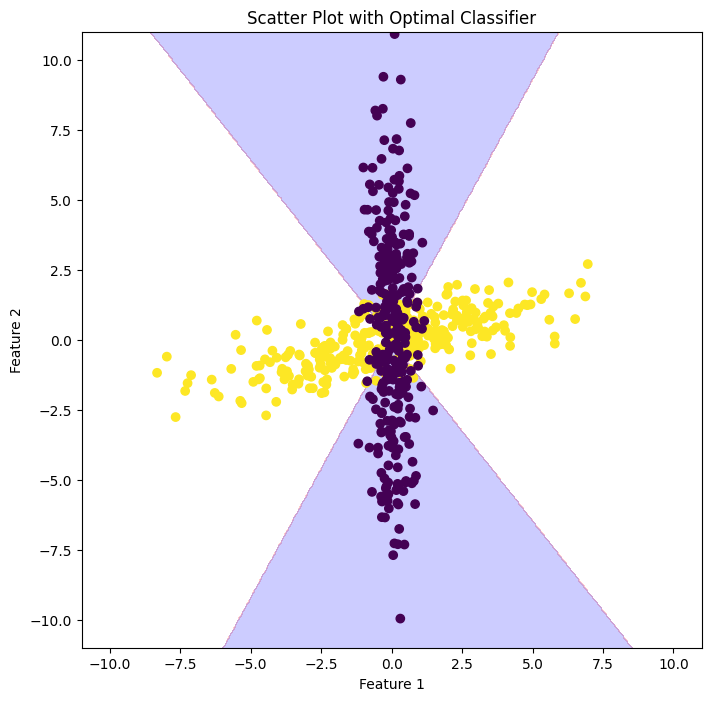

In [61]:
# Nothing to do here, just run the cell.
scatter_plot_g_opt(X, y, X1, X2, g_opt)

<h3 style="color:rgb(210,90,80)">Question 2.2 (2 Points):</h3>

***Answer the following questions about the plot you just created:***

a2_) Did the classifier perform well on the task i.e. do the decision boundaries seem to match the classes as plotted in Task 1.1?<br>
b2_) Are datapoints that lie in the middle (i.e. overlapping) region of the two classes less prone to being misclassified compared to data far away from the center?<br>

To answer the question, assign "True" or "False" boolean values to variables in the next cell. For example, if you think that **a2_)** is correct, define a variable `a2_` and set it to `True`, the same applies to **b2_)**. A non-correctly answered question as well as no answer (i.e. answer “None”) yields 0 points for a specific question.<br>
<b>Note:</b> Do not reuse these variable names. They are used for testing.

In [62]:
# YOUR CODE HERE
a2_ = True
b2_ = False

In [63]:
# DO NOT DELETE THIS CELL!
assert a2_ is not None, "Store True/False!"
assert a2_ in [True, False], "Invalid Answer!"

In [64]:
# DO NOT DELETE THIS CELL!
assert b2_ is not None, "Store True/False!"
assert b2_ in [True, False], "Invalid Answer!"

<h2 style="color:rgb(0,120,170)">Task 3: Details for bias-variance decomposition for quadratic loss</h2>

An explicit formula of the bias variance decomposition for the quadratic loss was mentioned in the lecture. In this task, you will prove this decomposition yourselves. To this end, let us introduce some notation:

$Z_l = (X,\mathbf{y})$ denotes a data matrix of $l$ elements, with $X$ the ($d\times l$)-dimensional feature matrix and $\mathbf{y}$ the $l$-dimensional (column) label vector. $g(\mathbf{x}_0;\mathbf{w}(Z_l)))$ denotes the model, parametrized by the vector $\mathbf{w}(Z_l)$ trained on $Z_l$, and the variable $y$ is the label corresponding to a (new) feature vector $\mathbf{x}_0$. 

Our object of interest is the expected prediction error (EPE) for
$\mathbf{x}_0$ in case of the quadratic loss, i.e.:

$$\mathrm{EPE}(\mathbf{x}_0) = \mathrm{E}_{y\mid
\mathbf{x}_0,Z_l}\big(L_{\mathbf{q}}(y,g(\mathbf{x}_0;\mathbf{w}(Z_l)))\big)
= \mathrm{E}_{y\mid
\mathbf{x}_0,Z_l}\big((y-g(\mathbf{x}_0;\mathbf{w}(Z_l)))^2\big)$$

We assume that $y\!\mid\!\mathbf{x}_0$ and the selection of training samples $Z_l$ are
independent which results in the following reformulation of the total expected prediction error:

$$\mathrm{EPE}(\mathbf{x}_0) = \mathrm{E}_{y\mid
\mathbf{x}_0}\Big(\mathrm{E}_{Z_l}\big((y-g(\mathbf{x}_0;\mathbf{w}(Z_l)))^2\big)\Big) \qquad \text{(1)}$$

Show that we can obtain the following bias-variance decomposition:

\begin{align}
\mathrm{EPE}(\mathbf{x}_0)=&\,\operatorname{Var}(y\!\mid\!\mathbf{x}_0) \\
&+\Big(\mathrm{E}_{y\mid\mathbf{x}_0}(y)-E_{Z_l}\big(g(\mathbf{x}_0;\mathbf{w}(Z_l))\big)\Big)^2 & \text{(2)}\\
&+\mathrm{E}_{Z_l}\Big(\big(g(\mathbf{x}_0;\mathbf{w}(Z_l))-E_{Z_l}(g(\mathbf{x}_0;\mathbf{w}(Z_l)))\big)^2\Big) 
\end{align}

For your calculation please use the given notation. Follow the steps indicated below.

<h3 style="color:rgb(210,90,80)">Calculation 3.1 (5 Points): Expand the Expected Prediction Error.</h3>

Expand $\mathrm{EPE}(\mathbf{x}_0)$, i.e. eq. (1) above, and write it as three separate terms.

$$\mathrm{EPE}(\mathbf{x}0) = \mathrm{E}{y\mid
\mathbf{x}0,Z_l}\big(L{\mathbf{q}}(y,g(\mathbf{x}0;\mathbf{w}(Z_l)))\big)
= \mathrm{E}{y\mid
\mathbf{x}_0,Z_l}\big((y-g(\mathbf{x}_0;\mathbf{w}(Z_l)))^2\big)$$
Expanding this expression, we can write it as three separate terms:

$\mathrm{E}_{y\mid \mathbf{x}_0,Z_l}[y^2]$
$-2\mathrm{E}_{y\mid \mathbf{x}_0,Z_l}[yg(\mathbf{x}_0;\mathbf{w}(Z_l))]$
$\mathrm{E}_{y\mid \mathbf{x}_0,Z_l}[g(\mathbf{x}_0;\mathbf{w}(Z_l))^2]$

The expanded expression for $\mathrm{EPE}(\mathbf{x}_0)$ is, therefore:
$$\mathrm{EPE}(\mathbf{x}0) = \mathrm{E}{y\mid \mathbf{x}0,Z_l}[y^2] - 2\mathrm{E}{y\mid \mathbf{x}_0,Z_l}[yg(\mathbf{x}0;\mathbf{w}(Z_l))] + \mathrm{E}{y\mid \mathbf{x}_0,Z_l}[g(\mathbf{x}_0;\mathbf{w}(Z_l))^2]$$

<h3 style="color:rgb(210,90,80)">Calculation 3.2 (5 Points): Rewrite $\operatorname{Var}(y\!\mid\!\mathbf{x}_0)$ using expected values. </h3>

Write the label variance (unavoidable error), i.e. term 1 in (2), in terms of expectation values.

$$\mathrm{EPE}(\mathbf{x}0) = \mathrm{E}{y\mid \mathbf{x}0}\Big(\mathrm{E}{Z_l}\big((y-g(\mathbf{x}_0;\mathbf{w}(Z_l)))^2\big)\Big)$$
Expanding the square term, we get:
$$\mathrm{EPE}(\mathbf{x}0) = \mathrm{E}{y\mid \mathbf{x}0}\Big(\mathrm{E}{Z_l}\big(y^2 - 2yg(\mathbf{x}_0;\mathbf{w}(Z_l)) + g(\mathbf{x}_0;\mathbf{w}(Z_l))^2\big)\Big)$$
Rearranging the terms, we have:
$$\mathrm{EPE}(\mathbf{x}0) = \mathrm{E}{y\mid \mathbf{x}0}\big(y^2\big) - 2\mathrm{E}{y\mid \mathbf{x}_0,Z_l}\big(yg(\mathbf{x}0;\mathbf{w}(Z_l))\big) + \mathrm{E}{Z_l}\big(g(\mathbf{x}_0;\mathbf{w}(Z_l))^2\big)$$

<h3 style="color:rgb(210,90,80)">Calculation 3.3 (4 Points): Expand the squared bias.</h3>

Expand the squared bias, i.e. term 2 in (2), and write it in three separate terms.

The label variance, $\operatorname{Var}(y!\mid!\mathbf{x}_0)$, can be written in terms of expected values as follows:
$$\operatorname{Var}(y!\mid!\mathbf{x}0) = \mathrm{E}{y\mid \mathbf{x}0}\big(y^2\big) - \big(\mathrm{E}{y\mid \mathbf{x}_0}(y)\big)^2$$
Substituting this back into the expanded EPE expression, we get:
$$\mathrm{EPE}(\mathbf{x}_0) = \operatorname{Var}(y!\mid!\mathbf{x}0) - 2\mathrm{E}{y\mid \mathbf{x}_0,Z_l}\big(yg(\mathbf{x}0;\mathbf{w}(Z_l))\big) + \mathrm{E}{Z_l}\big(g(\mathbf{x}_0;\mathbf{w}(Z_l))^2\big)$$
This expression can be further simplified to obtain the bias-variance decomposition as shown in the statement of the problem.

<h3 style="color:rgb(210,90,80)">Calculation 3.4 (5 Points): Expand the variance of the model.</h3>

Expand model variance, i.e. term 3 in (2), into three terms, and then simplify it to only two terms.

Eventually, show that adding up your results from 3.2., 3.3., and 3.4. leads to your results from 3.1. That concludes the proof.

The third term in the bias-variance decomposition (2) is the variance of the model:
$$\mathrm{E}_{Z_l}\Big(\big(g(\mathbf{x}0;\mathbf{w}(Z_l))-\mathrm{E}{Z_l}(g(\mathbf{x}_0;\mathbf{w}(Z_l)))\big)^2\Big)$$
We can expand this term as follows:
$$\begin{align*}
&\mathrm{E}_{Z_l}\Big(\big(g(\mathbf{x}0;\mathbf{w}(Z_l))-\mathrm{E}{Z_l}(g(\mathbf{x}0;\mathbf{w}(Z_l)))\big)^2\Big) \
&= \mathrm{E}{Z_l}\Big(g(\mathbf{x}_0;\mathbf{w}(Z_l))^2 - 2g(\mathbf{x}0;\mathbf{w}(Z_l))\mathrm{E}{Z_l}(g(\mathbf{x}0;\mathbf{w}(Z_l))) + \mathrm{E}{Z_l}(g(\mathbf{x}0;\mathbf{w}(Z_l)))^2\Big) \
&= \mathrm{E}{Z_l}\Big(g(\mathbf{x}0;\mathbf{w}(Z_l))^2\Big) - 2\mathrm{E}{Z_l}(g(\mathbf{x}0;\mathbf{w}(Z_l)))\mathrm{E}{Z_l}(g(\mathbf{x}0;\mathbf{w}(Z_l))) + \mathrm{E}{Z_l}(g(\mathbf{x}_0;\mathbf{w}(Z_l)))^2
\end{align*}$$
Simplifying further, we get:
$$\mathrm{E}_{Z_l}\Big(\big(g(\mathbf{x}0;\mathbf{w}(Z_l))-\mathrm{E}{Z_l}(g(\mathbf{x}0;\mathbf{w}(Z_l)))\big)^2\Big) = \mathrm{E}{Z_l}\Big(g(\mathbf{x}0;\mathbf{w}(Z_l))^2\Big) - \big(\mathrm{E}{Z_l}(g(\mathbf{x}_0;\mathbf{w}(Z_l)))\big)^2$$
Conclusion
Now, adding up the results from Calculations 3.2, 3.3, and 3.4, we get the final bias-variance decomposition:
$$\mathrm{EPE}(\mathbf{x}_0) = \operatorname{Var}(y!\mid!\mathbf{x}0) + \Big(\mathrm{E}{y\mid\mathbf{x}0}(y)-\mathrm{E}{Z_l}(g(\mathbf{x}0;\mathbf{w}(Z_l)))\Big)^2 + \mathrm{E}{Z_l}\Big(g(\mathbf{x}0;\mathbf{w}(Z_l))^2\Big) - \big(\mathrm{E}{Z_l}(g(\mathbf{x}_0;\mathbf{w}(Z_l)))\big)^2$$
This completes the proof of the bias-variance decomposition for the quadratic loss.

<h2 style="color:rgb(0,120,170)">Task 4: Bias-variance decomposition for regression</h2>

We intend to perform polynomial regression to illustrate the bias-variance decomposition for the regression task described before. To this end, perform the following steps:
* **Question 4.1**:<br>
  Consider the following one-dimensional regression task: inputs $x$ are
  sampled from the uniform distribution in $[−1, 3] \subset \mathbb{R}$ and targets $y$ are given as
  \begin{align*}
  f(x) &= 0.5\,x^4 + 2\,x^3 - 8\,x^2 \\
  y &= f(x) + \varepsilon,
  \end{align*}
  where $\varepsilon$ is independent normally distributed noise with mean $\mu=0$ and variance $\sigma^2 = 4$.
  
  Now, answer the given question.
* **Code 4.2**:
    * If a seed is given as function parameter, then set the seed using [np.random.seed](https://numpy.org/doc/2.0/reference/random/generated/numpy.random.seed.html).
    * Define the function `f(x)`, using the definition in **Question 4.1**.
    * Implement the function `create_X_train` which should return $S$ training sets with $N$ samples in the form of a `np.ndarray`. The x-values are uniformly sampled from `x_min` to `x_max`. Important: Use the function [np.random.uniform](https://numpy.org/doc/2.0/reference/random/generated/numpy.random.uniform.html) to complete this task!
    * Implement the function `create_y_train` which generates the training y-values according to **Question 4.1**, i.e. with Gaussian noise. Define the function for general mean `mu` and standard deviation `std`. Important: Use the function [np.random.normal](https://numpy.org/doc/2.0/reference/random/generated/numpy.random.normal.html) to complete this task!
    * Below, we provide the code for a function `pol_reg_pred` that trains a polynomial regression model with degree $m$ on a given training set and returns the prediction for a given test set (uniformly sampled $x$ values without labels). Use this to implement the function `bias_var` that estimates for each degree $m=1, ..., M$ the squared bias and the variance from the predictions for each of the $S$ training sets at $x_{test}$ and returns them in the `np.ndarrays` sqbias and variance. Each of these two arrays should then only contain $M$ elements.
* **Plot 4.3**:<br> 
  Utilize the function `pol_reg_pred` to produce a <em>single</em> plot that simultaneously visualizes the training data as dots (plot only the <em>first</em> instance of the $S$ training sets, i.e. `X_train[0]`) and the corresponding models for $m=1,4,11$. Don't forget to label the axes and give your plot a fitting title.
* **Plot 4.4**:<br>
Finally, visualize your results in another <em>single</em> plot where the dependence of **(i) the unavoidable error**, **(ii) the squared bias**, **(iii) the model variance**, and **(iv) the total EPE** is shown versus $m$. Again, don't forget to label the axes and give your plot a fitting title as well as plot a legend. Feel free to plot lines to guide the eye, although the horizontal axis is discrete.
* **Question 4.4**:<br>
Answer some questions about **Plot 4.4**.

<h3 style="color:rgb(210,90,80)">Question 4.1 (6 Points):</h3>

***What are $E(y\!\mid\!x_0)$ and the unavoidable error $\operatorname{Var}(y\!\mid\!x_0)$ for a fixed $x_0$ in the setting given above?***

a3_)   $E(y\!\mid\!x_0) = 0.5\,\sigma^4 + 2\,\sigma^3 - 8\,\sigma^2 \,\text{  and  } \operatorname{Var}(y\!\mid\!x_0) = x_0^2$. <br>
b3_)   $E(y\!\mid\!x_0) = 0.5\,\sigma^4 + 2\,\sigma^3 - 8\,\sigma^2 \,\text{  and  }  \operatorname{Var}(y\!\mid\!x_0) = \sigma^2$. <br>
c3_)   $E(y\!\mid\!x_0) = 0.5\,\sigma^4 + 2\,\sigma^3 - 8\,\sigma^2 \,\text{  and  }  \operatorname{Var}(y\!\mid\!x_0) = 2\sigma^2$. <br>
d3_)   $E(y\!\mid\!x_0) = 0.5\,x_0^4 + 2\,x_0^3 - 8\,x_0^2 \,\text{  and  }\operatorname{Var}(y\!\mid\!x_0) = 2\sigma^2$. <br>
e3_)   $E(y\!\mid\!x_0) = 0.5\,x_0^4 + 2\,x_0^3 - 8\,x_0^2 \,\text{  and  }\operatorname{Var}(y\!\mid\!x_0) = \sigma^2$. <br>
f3_)   $E(y\!\mid\!x_0) = 0.5\,x_0^4 + 2\,x_0^3 - 8\,x_0^2 \,\text{  and  } \operatorname{Var}(y\!\mid\!x_0) = 0.5\,x_0^4 + 2\,x_0^3 - 8\,x_0^2+\sigma^2$.<br>

To answer the question, assign "True" or "False" boolean values to variables in the next cell. For example, if you think that **a3_)** is correct, define a variable `a3_` and set it to `True`, the same applies to **b3_)** and the other options. A non-correctly answered question as well as no answer (i.e. answer “None”) yields 0 points for a specific question.<br>
<b>Note:</b> Do not reuse these variable names. They are used for testing.

In [65]:
# YOUR CODE HERE
a3_ = False
b3_ = True
c3_ = False
d3_ = False
e3_ = False
f3_ = False

In [66]:
# DO NOT DELETE THIS CELL!
assert a3_ is not None, "Store True/False!"
assert a3_ in [True, False], "Invalid Answer!"

In [67]:
# DO NOT DELETE THIS CELL!
assert b3_ is not None, "Store True/False!"
assert b3_ in [True, False], "Invalid Answer!"

In [68]:
# DO NOT DELETE THIS CELL!
assert c3_ is not None, "Store True/False!"
assert c3_ in [True, False], "Invalid Answer!"

In [69]:
# DO NOT DELETE THIS CELL!
assert d3_ is not None, "Store True/False!"
assert d3_ in [True, False], "Invalid Answer!"

In [70]:
# DO NOT DELETE THIS CELL!
assert e3_ is not None, "Store True/False!"
assert e3_ in [True, False], "Invalid Answer!"

In [71]:
# DO NOT DELETE THIS CELL!
assert f3_ is not None, "Store True/False!"
assert f3_ in [True, False], "Invalid Answer!"

<h3 style="color:rgb(210,90,80)">4.2 Code (15 points):</h3>

In [72]:
# Nothing to do here, just run the cell.
def pol_reg_pred(X_train: np.ndarray, y_train: np.ndarray, x_test: np.ndarray, m: int, seed: int):
    """Train a polynomial regression model of specified degree and return predictions for test data.

    This function fits a polynomial regression model to the provided training data `(X_train, y_train)`
    with degree `m`, then uses this model to predict outputs for the test samples in `X_test`.

    Parameters
    ----------
    X_train : (N,) np.ndarray
        Vector of training samples.
    y_train : (N,) np.ndarray
        Vector of training labels.
    x_test : np.ndarray
        Vector of test samples for which predictions will be made.
    m : int
        Degree of the polynomial for regression.
    seed : int
        Seed for reproducibility.

    Returns
    -------
    prediction : np.ndarray
        Predictions for the `x_test` samples.
    """
    np.random.seed(seed)
    poly_reg = PolynomialFeatures(m)
    X_poly_train = poly_reg.fit_transform(X_train.reshape(-1, 1))
    X_poly_test= poly_reg.fit_transform(x_test.reshape(-1, 1))
    
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly_train, y_train)
    y_pred = lin_reg.predict(X_poly_test)
    
    return y_pred

In [73]:
def f(x: np.ndarray) -> np.ndarray:
    """Implementation of the polynomial from Question 4.1.
    
    Parameters
    ----------
    x : (N,) np.ndarray
        The input of the function.

    Returns
    -------
    output : (N,) np.ndarray
        The output of the function.
    """
    # YOUR CODE HERE
    return 0.5 * x**4 + 2 * x**3 - 8 * x**2

In [74]:
# DO NOT DELETE THIS CELL!
x = np.array([0.5, 2, 3, -4])
out = f(x)
assert isinstance(out, np.ndarray), "Output of function f is not a np.ndarray!"
assert out.shape == x.shape, "Output of funcfion f has a wrong shape!"
np.testing.assert_array_equal(out, np.array([-1.71875, -8., 22.5, -128.]), 4)

In [75]:
def create_X_train(S: int, N: int, x_min: float, x_max: float, seed: int) -> np.ndarray:
    """Generate `S` training sets, each containing `M` samples, within a specified interval.
    The function creates an array of shape (S, N) where each element is a sample drawn uniformly from the interval [`x_min`, `x_max`].
    
    Important: Use the function `np.random.uniform` to generate the data and `np.random.seed` to set the seed before generating the data!

    Parameters
    ----------
    S : int
        Number of training sets to create.
    N : int
        Number of samples per training set.
    x_min : float
        Lower bound of the sampling interval.
    x_max : float
        Upper bound of the sampling interval.
    seed : int
        Seed for reproducibility.

    Returns
    -------
    X_train : (S, N) np.ndarray
        A np.ndarray containing the generated sets of samples.
    """
    # YOUR CODE HERE
    np.random.seed(seed)
    X_train = np.random.uniform(x_min, x_max, size=(S, N))
    return X_train

In [76]:
# DO NOT DELETE THIS CELL!
S = 300
N = 25
x_min = -1
x_max = 3
seed = 66

X_train = create_X_train(S, N, x_min, x_max, seed)
assert isinstance(X_train, np.ndarray), "X_train is not a np.ndarray!"
assert X_train.shape == (S, N), "The output shape of X_train is incorrect!"

In [77]:
def create_y_train(X_train: np.ndarray, mu: float, std: float, f: callable, seed: int) -> np.ndarray:
    """Generate labels from training data using a function `f` with added Gaussian noise.

    This function applies `f` to the training set `X_train` to generate labels, then adds 
    Gaussian noise with specified mean `mu` and standard deviation `std` to each label. 
    A seed is used for reproducibility.

    Important: Use `np.random.seed` to set the seed and np.random.normal for the Gaussian noise!

    Parameters
    ----------
    X_train : (S, N) np.ndarray
        The training data set to which the function `f` will be applied.
    mu : float
        Mean of the Gaussian noise.
    std : float
        Standard deviation of the Gaussian noise.
    f : callable
        A function to apply to `X_train` to generate labels.
    seed : int
        Random seed for reproducibility.

    Returns
    -------
    y_train : (S, N) np.ndarray
        An array containing the generated labels with added noise.
    """
    # YOUR CODE HERE
    np.random.seed(seed)
    y_train = f(X_train) + np.random.normal(mu, std, size=X_train.shape)
    return y_train

In [78]:
# DO NOT DELETE THIS CELL!
seed = 66
mu = 0
std = 2
ref_X_train = np.arange(10).reshape(2, -1)

ref_y_train = create_y_train(ref_X_train, mu, std, lambda x: x**2, seed)
assert isinstance(ref_y_train, np.ndarray), "y_train is not a np.ndarray!"
assert ref_y_train.shape == ref_X_train.shape, "y_train has a wrong shape!"
np.testing.assert_array_almost_equal(ref_y_train, np.array([[2.83122873, -1.1705728, 2.76738393, 7.48616765, 16.69409546], [28.11298221, 30.08730288, 51.71816136, 65.29669358, 81.57205749]]), 4)

In [79]:
def bias_var(X_train: np.ndarray, y_train: np.ndarray, x_test: np.ndarray, M: int, f: callable, seed: int) -> tuple[np.ndarray, np.ndarray]: 
    """Compute model bias and variance for polynomial regression models of varying degrees.

    This function estimates the squared bias and variance of polynomial regression models
    of degrees ranging from 1 to `M` by sampling training sets, fitting each model, 
    and evaluating each at a specified test set `x_test`.

    Important: Pass the seed to `pol_reg_pred` and use this function 
    for computing the predictions of the polynomial regression models!

    Parameters
    ----------
    X_train : (S, N) np.ndarray
        Array of training data sets, where each element is an array of samples.
    y_train : (S, N) np.ndarray
        Array of training label sets, where each element is an array of labels.
    x_test : np.ndarray
        A 1D test data set.
    M : int
        The maximum polynomial degree to evaluate.
    f : callable
        The true function to compare the predictions against.
    seed : int
        Random seed for reproducibility.

    Returns
    -------
    tuple of np.ndarray
        - sqbias : (M,) np.ndarray
            Array of squared bias values for polynomial degrees from 1 to `M`.
        - variance : (M,) np.ndarray
            Array of variance values for polynomial degrees from 1 to `M`.
    """
    S = X_train.shape[0]  # Number of training sets
    sqbias = np.zeros(M)
    variance = np.zeros(M)
    
    # Store predictions across training sets for each degree
    for m in range(1, M + 1):
        # Collect predictions for each training set with the given degree m
        preds = np.array([pol_reg_pred(X_train[i], y_train[i], x_test, m, seed) for i in range(S)])
        
        # Expected prediction (mean of predictions across S training sets)
        expected_pred = np.mean(preds, axis=0)
        
        # True function values at x_test
        true_vals = f(x_test)
        
        # Calculate squared bias
        sqbias[m - 1] = np.mean((expected_pred - true_vals) ** 2)
        
        # Calculate variance
        variance[m - 1] = np.mean(np.var(preds, axis=0))
    
    return sqbias, variance

In [80]:
# DO NOT DELETE THIS CELL!
seed = 66
M = 11
ref_X_train = np.arange(10).reshape(2, -1)
ref_y_train = np.arange(10, 20).reshape(2, -1)
ref_x_test = np.arange(5)

ref_sqbias, _ = bias_var(ref_X_train, ref_y_train, ref_x_test, M, lambda x: x**2, seed)
assert isinstance(ref_sqbias, np.ndarray), "The returned squared bias is not a np.ndarray!"
assert ref_sqbias.shape == (M,), "The returned squared bias has a wrong shape!"
np.testing.assert_array_almost_equal(ref_sqbias, np.array([56.8, 56.8, 56.8, 56.8, 60.8229, 64.8283, 68.2727, 71.0926, 73.3658, 75.1944, 76.6702]), 4)

In [81]:
# DO NOT DELETE THIS CELL!
seed = 66
M = 11
ref_X_train = np.arange(10).reshape(2, -1)
ref_y_train = np.arange(10, 20).reshape(2, -1)
ref_x_test = np.arange(5)

_, ref_var = bias_var(ref_X_train, ref_y_train, ref_x_test, M, lambda x: x**2, seed)
assert isinstance(ref_var, np.ndarray), "The returned variance is not a np.ndarray!"
assert ref_var.shape == (M,), "The returned variance has a wrong shape!"
np.testing.assert_array_almost_equal(ref_var, np.array([0.0000e+00, 2.5244e-30, 6.2031e-25, 4.5267e-22, 9.3123e-02, 3.1799e-01, 5.9439e-01, 8.7445e-01, 1.1357e+00, 1.3697e+00, 1.5748e+00]), 4)

In [82]:
# Nothing to do here, just run the cell.
seed = 12
S = 300
N = 25
M = 11
x_min = -1
x_max = 3
mu = 0
sigma_squared = 4
std = np.sqrt(sigma_squared)
x_test = np.array([1.7])

X_train = create_X_train(S,N,x_min,x_max,seed)
y_train = create_y_train(X_train,mu,std,f,seed)
sqbias, variance = bias_var(X_train,y_train,x_test,M,f,seed)
print("Shapes of X and y: \n",X_train.shape,y_train.shape)
print("\nSquared Bias over m: \n", sqbias)
print("\nVariance over m: \n", variance)

Shapes of X and y: 
 (300, 25) (300, 25)

Squared Bias over m: 
 [5.50461692e+01 2.58892159e+01 6.39322745e-03 1.51847647e-06
 8.31015750e-05 3.52859200e-03 9.14787903e-03 1.74217969e-03
 1.61017488e-02 1.01851959e-03 4.57567286e-02]

Variance over m: 
 [ 4.43612857  2.30715582  0.6861143   0.72331817  1.03163253  1.28427733
  1.79658367  2.78252631  2.84032616  6.33845148 19.35307884]


<h3 style="color:rgb(210,90,80)">Plot 4.3 (5 Points):</h3>

In [83]:
# Nothing to do here, just run the cell.
x_test = np.arange(x_min, x_max, 0.01)

In [84]:
def plot_regression(X_train: np.ndarray, y_train: np.ndarray, x_test: np.ndarray, seed: int):
    """
    Creates a plot for the first set of training data and the corresponding regression models with m = {1, 4, 11}.
    
    Parameters
    ----------
    X_train : (S, N) np.ndarray
        Sets of training data.
    y_train : (S, N) np.ndarray
        Sets of training labels.
    x_test : np.ndarray
        Vector of test data.
    seed : int
        Random seed for reproducibility in the `pol_reg_pred` function.
    """
    
    X_train_0 = X_train[0]
    y_train_0 = y_train[0]
    
    degrees = [1, 4, 11]
    
    plt.scatter(X_train_0, y_train_0, color='black', label='Training data')
    
    for m in degrees:
        y_pred = pol_reg_pred(X_train_0, y_train_0, x_test, m, seed)
        plt.plot(x_test, y_pred, label=f'm = {m}')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Polynomial Regression Models for Different Degrees')
    plt.legend()
    plt.show()


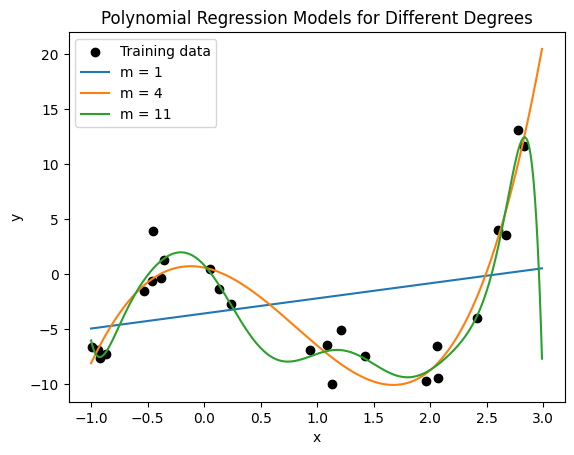

In [85]:
# Nothing to do here, just run the cell.
plot_regression(X_train, y_train, x_test, seed)

<h3 style="color:rgb(210,90,80)">Plot 4.4 (5 Points):</h3>

In [86]:
def plot_combination(M: int, sigma: float, bias: np.ndarray, var: np.ndarray):
    """Creates a plot for the unavoidable error, bias, variance, and Expected Prediction Error (EPE) versus polynomial degree `m` in the range [1, M].

    Parameters
    ----------
    M : int
        The maximum polynomial degree for which to plot the error components, with `m` ranging from 1 to `M`.
    sigma : float
        The unavoidable error level, representing noise in the data.
    bias : np.ndarray
        Array of squared bias values for polynomial degrees in [1, M].
    var : np.ndarray
        Array of variance values for polynomial degrees in [1, M].
    """
    # YOUR CODE HERE
    # Polynomial degrees ranging from 1 to M
    degrees = np.arange(1, M + 1)
    
    # Compute EPE as the sum of unavoidable error, bias, and variance
    unavoidable_error = np.full_like(degrees, sigma**2)
    epe = unavoidable_error + bias + var
    
    # Plot the components
    plt.figure(figsize=(10, 6))
    plt.plot(degrees, unavoidable_error, label="Unavoidable Error (Noise)", color="gray", linestyle="--")
    plt.plot(degrees, bias, label="Bias^2", color="blue")
    plt.plot(degrees, var, label="Variance", color="orange")
    plt.plot(degrees, epe, label="Expected Prediction Error (EPE)", color="red")
    
    # Set plot details
    plt.xlabel("Polynomial Degree (m)")
    plt.ylabel("Error")
    plt.title("Bias-Variance Decomposition and EPE vs. Polynomial Degree")
    plt.legend()
    plt.grid(True)
    plt.show()

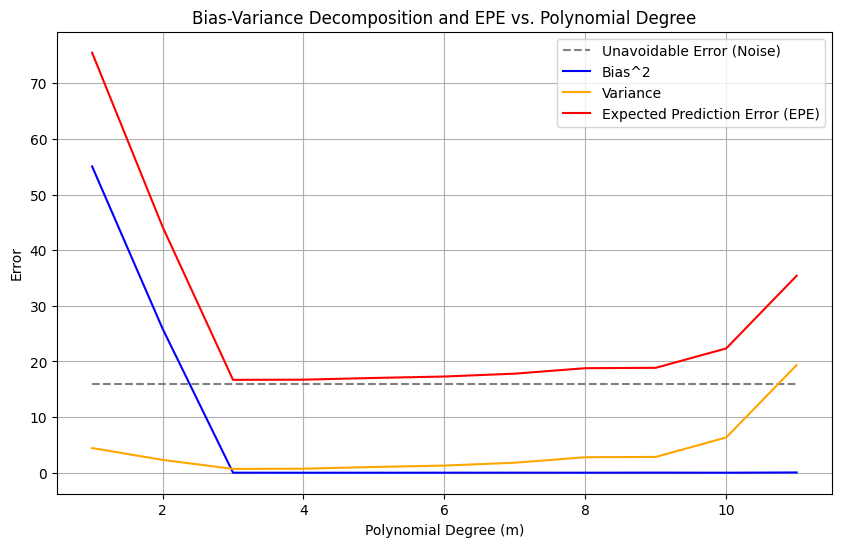

In [87]:
# Nothing to do here, just run the cell.
plot_combination(M, sigma_squared, sqbias, variance)

<h3 style="color:rgb(210,90,80)">Question 4.4 (5 Points):</h3>

If you did the previous task correctly, the resulting plot should have many similarities or should be identical to the following plot:

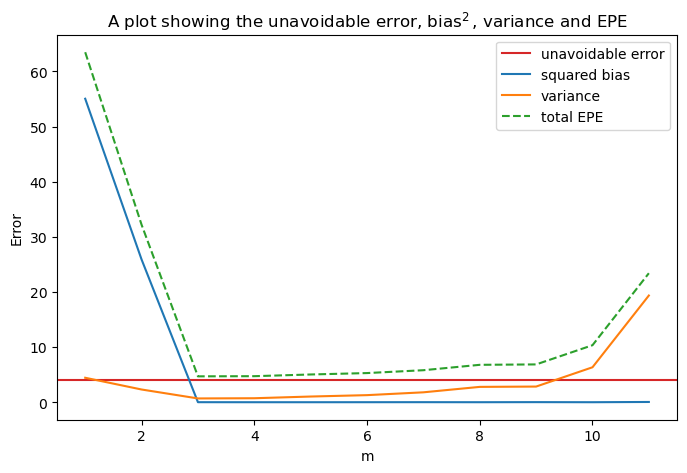

***What observations can you make from this plot? Answer which of the following statements are correct (several may be correct):***

a4_) The variance is low for models which are too complex, i.e. $m \leq 2$. <br>
b4_) For appropriate complexity, i.e. $3 \leq m \leq 6$, both model variance and bias are low, which can indicate good generalization abilities.<br>
c4_) As the model becomes too complex, i.e. $m \geq 9$, the variance increases again while the bias stays low. This is an indication for overfitting.<br>
d4_) For models with $m \geq 9$, the variance is high (i.e. significantly larger than $0$) because the independent noise has zero mean and high individual biases cancel in expectation. <br>
e4_) For models with $m \geq 9$, the bias is still low (i.e. close to $0$) because the independent noise has zero mean and high individual biases cancel in expectation. <br>

To answer the question, assign "True" or "False" boolean values to variables in the next cell. For example, if you think that **a4_)** is correct, define a variable `a4_` and set it to `True`, the same applies to **b4_)** and the other statements. A non-correctly answered statement as well as no answer (i.e. answer “None”) yields 0 points for a specific statement.<br>
<b>Note:</b> Do not reuse these variable names. They are used for testing.

In [88]:
# YOUR CODE HERE
a4_ = False
b4_ = True
c4_ = True
d4_ = True
e4_ = True

In [89]:
# DO NOT DELETE THIS CELL!
assert a4_ is not None, "Store True/False!"
assert a4_ in [True, False], "Invalid Answer!"

In [90]:
# DO NOT DELETE THIS CELL!
assert b4_ is not None, "Store True/False!"
assert b4_ in [True, False], "Invalid Answer!"

In [91]:
# DO NOT DELETE THIS CELL!
assert c4_ is not None, "Store True/False!"
assert c4_ in [True, False], "Invalid Answer!"

In [92]:
# DO NOT DELETE THIS CELL!
assert d4_ is not None, "Store True/False!"
assert d4_ in [True, False], "Invalid Answer!"

In [93]:
# DO NOT DELETE THIS CELL!
assert e4_ is not None, "Store True/False!"
assert e4_ in [True, False], "Invalid Answer!"

<h2 style="color:rgb(0,120,170)">Task 5: Evaluation metrics for imbalanced data sets</h2>

Consider a classifier with discriminant function $\bar g$.
For a given labeled data set, the following results are obtained:
$$\begin{array}{|r|r|}
\hline
y & \bar g(x)\\
\hline \hline
 +1 & 0.93 \\
 +1 & 0.51 \\
 -1 & 0.48 \\
 -1 & 0.13 \\
 +1 & 0.02 \\
 -1 & -0.11 \\
 -1 & -0.25 \\
 -1 & -0.37 \\
 +1 & -0.41 \\
 -1 & -1.68 \\
 +1 & -2.23 \\
 +1 & -3.41 \\
\hline
\end{array}$$

* **Code 5.1**:
  * Compute the confusion matrix using the usual $\theta = 0$ threshold.
  * Complete the function `evaluation_metrics` to calculate the following evaluation measures: TPR, TNR, FPR, FNR, ACC, BACC, PREC, and $F_1$.

Let's say we have a population of 1000 people and we know that 50 are infected with the corona virus.
* **Code 5.2**: Assume that the population is tested with an assay that has a certain specificity and sensitivity.

  * (1) What is the probability $p_1$ that a person is *not* infected if they are diagnosed as ill by the test? <br>
  * (2) What is the probability $p_2$ that a person is infected if they are diagnosed as healthy by the test?

Write a function that returns both values. Then check your calculation using specificity of $90 \%$ and sensitivity of $95 \%$.

**Important**: Round your result to 4 decimal points, i.e. 0.9871 if it is 98.71%.

<h3 style="color:rgb(210,90,80)">Code 5.1 (8 Points):</h3>

* <b>Reminder:</b> Confusion Matrix structure:

$$
\begin{array}{|c|c|c|}
\hline
 & g(x)=+1  & g(x)=-1\\
 \hline
 y=+1 & \text{TP}  & \text{FN} \\
 \hline
 y=-1 & \text{FP} & \text{TN} \\
\hline
\end{array}
$$

Define 4 variables `TP_`, `FN_`, `FP_` and `TN_` and assign the correct number assuming the usual $\theta = 0$ threshold.

In [94]:
# YOUR CODE HERE
TP_ = 3
FN_ = 3
FP_ = 2
TN_ = 4

In [95]:
# DO NOT DELETE THIS CELL!
assert isinstance(TP_, int), "The number of TP is not an integer!"

In [96]:
# DO NOT DELETE THIS CELL!
assert isinstance(FN_, int), "The number of FN is not an integer!"

In [97]:
# DO NOT DELETE THIS CELL!
assert isinstance(FP_, int), "The number of FP is not an integer!"

In [98]:
# DO NOT DELETE THIS CELL!
assert isinstance(TN_, int), "The number of TN is not an integer!"

In [99]:
def evaluation_meatrics(TP: int, TN: int, FP: int, FN: int) -> tuple[float, float, float, float, float, float, float, float]:
    """Calculate evaluation metrics for a binary classification model.

    This function computes common evaluation metrics, including True Positive Rate (TPR),
    True Negative Rate (TNR), False Positive Rate (FPR), False Negative Rate (FNR), 
    Accuracy (ACC), Balanced Accuracy (BACC), Precision (PREC), and F1 Score (F1), 
    based on the counts of true positives, true negatives, false positives, and false negatives.

    Parameters
    ----------
    TP : int
        Number of true positive cases.
    TN : int
        Number of true negative cases.
    FP : int
        Number of false positive cases.
    FN : int
        Number of false negative cases.

    Returns
    -------
    tuple of float
        - TPR : float
            True Positive Rate, or Recall.
        - TNR : float
            True Negative Rate, or Specificity.
        - FPR : float
            False Positive Rate.
        - FNR : float
            False Negative Rate.
        - ACC : float
            Accuracy of the model.
        - BACC : float
            Balanced Accuracy, the average of TPR and TNR.
        - PREC : float
            Precision of the model.
        - F1 : float
            F1 Score, the harmonic mean of Precision and Recall
    """    
    # YOUR CODE HERE
    # Calculate metrics
    TPR = TP / (TP + FN) if (TP + FN) != 0 else 0  # Recall
    TNR = TN / (TN + FP) if (TN + FP) != 0 else 0  # Specificity
    FPR = FP / (TN + FP) if (TN + FP) != 0 else 0
    FNR = FN / (TP + FN) if (TP + FN) != 0 else 0
    ACC = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) != 0 else 0
    BACC = (TPR + TNR) / 2
    PREC = TP / (TP + FP) if (TP + FP) != 0 else 0
    F1 = 2 * (PREC * TPR) / (PREC + TPR) if (PREC + TPR) != 0 else 0

    return TPR, TNR, FPR, FNR, ACC, BACC, PREC, F1

In [100]:
# DO NOT DELETE THIS CELL!
TPR_, TNR_, FPR_, FNR_, ACC_, BACC_, PREC_, F1_ = evaluation_meatrics(TP_, TN_, FP_, FN_)
assert isinstance(TPR_, float), "The TPR is not a float!"
assert TPR_ == 0.5, "The TPR is wrong!"

In [101]:
# DO NOT DELETE THIS CELL!
assert isinstance(TNR_, float), "The TNR is not a float!"
assert TNR_ == 2/3, "The TNR is wrong!"

In [102]:
# DO NOT DELETE THIS CELL!
assert isinstance(FPR_, float), "The FPR is not a float!"
assert FPR_ == 1/3, "The FPR is wrong!"

In [103]:
# DO NOT DELETE THIS CELL!
assert isinstance(FNR_, float), "The FNR is not a float!"
assert FNR_ == 0.5, "The FNR is wrong!"

In [104]:
# DO NOT DELETE THIS CELL!
assert isinstance(ACC_, float), "The ACC is not a float!"
assert round(ACC_, 3) == 0.583, "The ACC is wrong!"

In [105]:
# DO NOT DELETE THIS CELL!
assert isinstance(BACC_, float), "The BACC is not a float!"
assert round(BACC_, 3) == 0.583, "The BACC is wrong!"

In [106]:
# DO NOT DELETE THIS CELL!
assert isinstance(PREC_, float), "The PREC is not a float!"
assert PREC_ == 0.6, "The PREC is wrong!"

In [107]:
# DO NOT DELETE THIS CELL!
assert isinstance(F1_, float), "The F1 is not a float!"
assert F1_ == 6/11, "The F1 is wrong!"

In [108]:
# Nothing to do here, just run the cell.
print(" TPR = {:.3f}\n TNR = {:.3f}\n FPR = {:.3f}\n FNR = {:.3f}\n ACC = {:.3f}\nBACC = {:.3f}\nPREC = {:.3f}\n  F1 = {:.3f}".format(TPR_, TNR_, FPR_, FNR_, ACC_, BACC_, PREC_, F1_))

 TPR = 0.500
 TNR = 0.667
 FPR = 0.333
 FNR = 0.500
 ACC = 0.583
BACC = 0.583
PREC = 0.600
  F1 = 0.545


<h3 style="color:rgb(210,90,80)">Calculation 5.2 (7 Points):</h3>

In [109]:
def calc_prob(spec: float, sens: float, pop: int, inf: int) -> tuple[float, float]:
    """Calculate the rounded probabilities of false positives and false negatives.

    This function computes two probabilities: 
    - `p1`: the probability of a false positive given a positive test result.
    - `p2`: the probability of a false negative given a negative test result.

    Parameters
    ----------
    spec : float
        Specificity of the test (True Negative Rate).
    sens : float
        Sensitivity of the test (True Positive Rate).
    pop : int
        Total population size.
    inf : int
        Number of infected individuals in the population.

    Returns
    -------
    tuple of float
        - p1 : float
            Probability of a false positive given a positive test result, rounded to 4 decimal places.
        - p2 : float
            Probability of a false negative given a negative test result, rounded to 4 decimal places.
    """
    # YOUR CODE HERE
    # Number of infected and non-infected people
    non_inf = pop - inf
    
    # True Positives and False Negatives for infected people
    TP = sens * inf
    FN = (1 - sens) * inf
    
    # True Negatives and False Positives for non-infected people
    TN = spec * non_inf
    FP = (1 - spec) * non_inf
    
    # Probability of a false positive given a positive test result
    p1 = FP / (TP + FP) if (TP + FP) != 0 else 0
    # Probability of a false negative given a negative test result
    p2 = FN / (TN + FN) if (TN + FN) != 0 else 0
    
    # Round the results to 4 decimal places
    return round(p1, 4), round(p2, 4)

In [110]:
# DO NOT DELETE THIS CELL!
p1, _ = calc_prob(0.90, 0.95, 1000, 50)
assert isinstance(p1, float), "The probability of a false positive is not a float!"
assert p1 == 0.6667, "The probability of a false positive is not correct!"

In [111]:
# DO NOT DELETE THIS CELL!
_, p2 = calc_prob(0.90, 0.95, 1000, 50)
assert isinstance(p2, float), "The probability of a false negative is not a float!"
assert p2 == 0.0029, "The probability of a false negative is not correct!"

In [112]:
print("The probability that a person who is tested positive is in fact not infected is {}".format(p1))
print("The probability that a person who is tested negative is in fact infected is {}".format(p2))

The probability that a person who is tested positive is in fact not infected is 0.6667
The probability that a person who is tested negative is in fact infected is 0.0029
